## Zadanie domowe: BBHE i DSIHE

W klasycznym wyrównywaniu histogramu HE  po wykonaniu operacji jasność obrazu ulega zmianie.
Dało się to zaobserwować podczas przeprowadzonych eksperymentów.
Jeśli nie to należy uruchomić skrypt z sekcji A i zwrócić na to uwagę.
Średnia jasność dąży do środkowego poziomu szarości.
Jest to wada i dlatego klasyczne HE ma ograniczone zastosowanie.

Powstało sporo metod, które eliminują to niekorzystne zjawisko.
Najprostsze z nich polegają na dekompozycji obrazu wejściowego na dwa podobrazy (wg. pewnego kryterium).
Następnie operacja HE wykonywana jest dla tych podobrazów.

Dwie znane z literatury metody to:
- Bi-Histogram Equalization
- DSIHE - Dualistic Sub-Image Histogram Equalization

W metodzie BBHE za kryterium podziału przyjmuje się średnią jasność w obrazie.
W DSIHE obraz dzieli się na dwa podobrazy o takiej samej liczbie pikseli (jaśniejszych i ciemniejszych).

W ramach zadania należy zaimplementować wybraną metodę: BBHE lub DSIHE (ew. obie).

1. Wczytaj obraz *jet.bmp* i wylicz jego histogram.
2. W kolejnym kroku należy wyznaczyć próg podziału obrazu na dwa podobrazy (*lm*).
3. Dla BBHE wyznacz średnią jasność obrazu. Dla DSIHE można wykorzystać histogram skumulowany.
Należy znaleźć poziom jasności który znajduje się "w połowie" histogramu skumulowanego.
W tym celu warto stworzyć tablicę, zawierającą moduł histogramu skumulowanego pomniejszonego o połowę liczby pikseli.
Następnie znaleźć minimum - `np.argmin`.
4. Dalej należy podzielić histogram oryginalnego obrazu na dwa histogramy *hist_darker* i *hist_brighter*.
Dla każdego z nich wyliczyć histogram skumulowany ($C_1$ i $C_2$) i wykonać normalizację.
Normalizacja polega na podzieleniu każdego histogramu przez jego największy element.
5. Na podstawie histogramów skumulowanych należy stworzyć przekształcenie LUT.
Należy tak przeskalować $C_1$ i $C_2$, aby uzyskać jednorodne przekształcenie.
Tablicę $C_1$ wystarczy pomnożyć przez próg podziału.
Tablicę $C_2$ należy przeskalować do przedziału: $<lm+1; 255>$, gdzie $lm$ jest progiem podziału.<br>
$C_{1n} = (lm)*C1;$<br>
$C_{2n} = lm+1 + (255-lm-1)*C2;$<br>
Następnie dwie części tablicy przekodowań należy połączyć.
6. Ostatecznie należy wykonać operację LUT i wyświetlić wynik wyrównywania histogramu.
Porównaj wynik operacji BBHE lub DSIHE z klasycznym HE.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [2]:
def process_image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    mean_brightness = int(np.mean(img))

    hist_darker = hist[:mean_brightness]
    hist_brighter = hist[mean_brightness:]

    cumulative_hist_darker = np.cumsum(hist_darker) / hist_darker.sum()
    cumulative_hist_brighter = np.cumsum(hist_brighter) / hist_brighter.sum()

    lut = np.zeros(256, dtype=np.uint8)
    lut[:mean_brightness] = (cumulative_hist_darker * mean_brightness).astype(np.uint8)
    lut[mean_brightness:] = (cumulative_hist_brighter * (255 - mean_brightness) + mean_brightness).astype(np.uint8)

    img_bbhe = cv2.LUT(img, lut)

    img_he = cv2.equalizeHist(img)

    plt.figure(figsize=(10, 6))
    
    plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray'), plt.title("Original image")
    plt.axis('off')
    plt.subplot(1, 3, 2), plt.imshow(img_he, cmap='gray'), plt.title("HE")
    plt.axis('off')
    plt.subplot(1, 3, 3), plt.imshow(img_bbhe, cmap='gray'), plt.title("BBHE")
    plt.axis('off')
    
    plt.show()

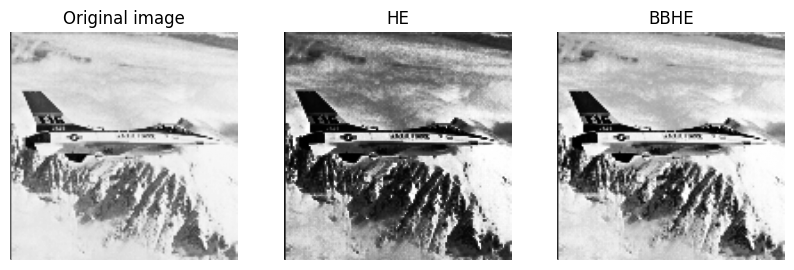

In [3]:
process_image(fileName)